Precipitation : Future return period of one day rainfall event with a current return period of 100 years

In [ ]:
from Functions_ImportData import import_filtered_NOAA_obs
df_obs_NOAA = import_filtered_NOAA_obs()

In [ ]:
# import original modeled NEX-GDDP-CMIP6
df_pr_NEXGDDPCMIP6=import_treat_modeled_NEX_GDDP_CMIP6('pr','mm_per_day','day',1950,2100)

In [ ]:
# import BC NEX-GDDP-CMIP6 past
df_pr_NEXGDDPCMIP6_BC_NOAA_past=import_BC_NOAA_NEX_GDDP_CMIP6('pr',1970,2014,EmplacementStationNOAA='no')

In [ ]:
# import BC NEX-GDDP-CMIP6 future
df_pr_NEXGDDPCMIP6_BC_NOAA_proj=import_BC_NOAA_NEX_GDDP_CMIP6('pr',2030,2074,EmplacementStationNOAA='no')

In [ ]:
from Functions_Indicators import dataframe_threshold_coresponding_to_return_period_obs

In [ ]:
from Functions_Indicators import dataframe_threshold_coresponding_to_return_period_model

In [ ]:
df_pr_NEXGDDPCMIP6_gorongosa_past= filter_dataframe(df_pr_NEXGDDPCMIP6,['Gorongosa_EIB'],['TaiESM1','CMCC-CM2-SR5','NESM3'],start_y=1970,stop_y=2014)

In [ ]:
df_pr_NEXGDDPCMIP6_gorongosa_future= filter_dataframe(df_pr_NEXGDDPCMIP6,['Gorongosa_EIB'],['TaiESM1','CMCC-CM2-SR5','NESM3'],start_y=2030,stop_y=2074)

In [ ]:
# past for modelled and non BC data
df_return_period_NEX_GDDP_CMIP6_past=dataframe_threshold_coresponding_to_return_period_model(df_pr_NEXGDDPCMIP6_gorongosa_past.dropna(),'Mean of the daily precipitation rate mm_per_day')

In [ ]:
df_return_period_NEX_GDDP_CMIP6_past['Period'] = '1970-2014'

In [ ]:
df_model_future=df_tas_NEXGDDPCMIP6[df_tas_NEXGDDPCMIP6['Year'].between(2030,2074)]

In [ ]:
df_return_period_NEX_GDDP_CMIP6_future=dataframe_threshold_coresponding_to_return_period_model(df_pr_NEXGDDPCMIP6_gorongosa_future.dropna(),'Mean of the daily precipitation rate mm_per_day')

In [ ]:
df_return_period_NEX_GDDP_CMIP6_future['Period'] = '2030-2065'

In [ ]:
# calculate return period with observation data

In [ ]:
# sure de cette function
import scipy
from scipy import stats
from scipy.stats import gumbel_r
from scipy.stats import gumbel_l
def return_period(df,T,start_y,stop_y):
    Z = df[df['Year'].between(start_y,stop_y)].groupby('Year')[['pr']].agg(np.nanmax)#.reshape(len(pr_obs_gorongosa_from_gorongosa.groupby('Year')[['pr']].max()),)
    #Z = Z[~np.isnan(Z)]
    (loc1,scale1)=scipy.stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
    value_for_T=threshold_coresponding_to_return_period(loc1,scale1,T)
    return value_for_T

In [ ]:
def threshold_coresponding_to_return_period(loc,scale,T):
    p_non_exceedance = 1 - (1/T)
    try:
        threshold_coresponding = round(gumbel_r.ppf(p_non_exceedance,loc,scale))
    except OverflowError: # the result is not finite
        if math.isinf(gumbel_r.ppf(p_non_exceedance,loc,scale)) and gumbel_r.ppf(p_non_exceedance,loc,scale)<0:
            # ppf is the inverse of cdf
            # the result is -inf
            threshold_coresponding = 0 # the value of wero is imposed
    return threshold_coresponding

In [ ]:
df_obs_NOAA = df_obs_NOAA.rename(columns={'PRCP':'pr'})

In [ ]:
df_obs_NOAA_Chimoio = df_obs_NOAA[df_obs_NOAA['NAME']=='CHIMOIO, MZ']

In [ ]:
df_return_period_obs=return_period(df_obs_NOAA_Chimoio[['pr','Year']],50,1970,2014)

In [ ]:
df_return_period_NEX_GDDP_CMIP6 = pd.concat([df_return_period_NEX_GDDP_CMIP6_past,df_return_period_NEX_GDDP_CMIP6_future])

In [ ]:
df_return_period_NEX_GDDP_CMIP6_gorongosa = df_return_period_NEX_GDDP_CMIP6.reset_index()[df_return_period_NEX_GDDP_CMIP6.reset_index()['Name project']=='Gorongosa_EIB']

In [ ]:
sns.boxplot(data=df_return_period_NEX_GDDP_CMIP6_gorongosa,x='Period',y='Value for return period 100 years mm/day',hue='Experiment')

event 100 year
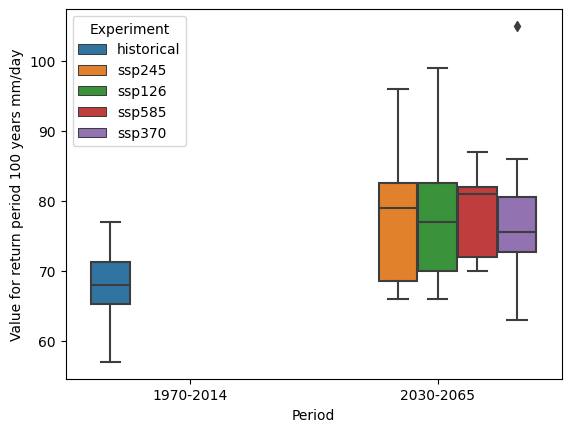

In [ ]:
sns.boxplot(data=df_return_period_NEX_GDDP_CMIP6_gorongosa,x='Period',y='Value for return period 50 years mm/day',hue='Experiment')

event 50 years
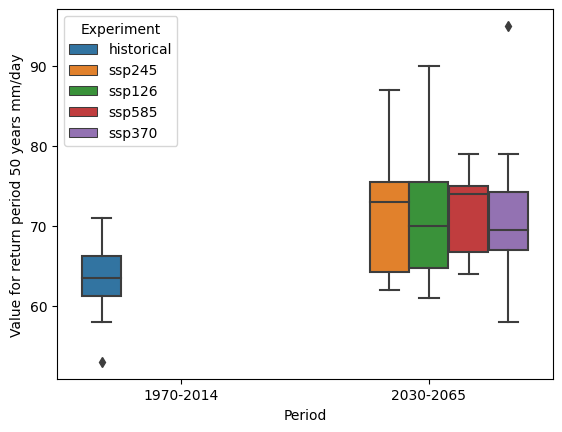

In [ ]:
sns.boxplot(data=df_return_period_NEX_GDDP_CMIP6_gorongosa[df_return_period_NEX_GDDP_CMIP6_gorongosa['Period']=='2030-2065'],x='Period',y='Value for return period 100 years mm/day',hue='Model')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

100 year
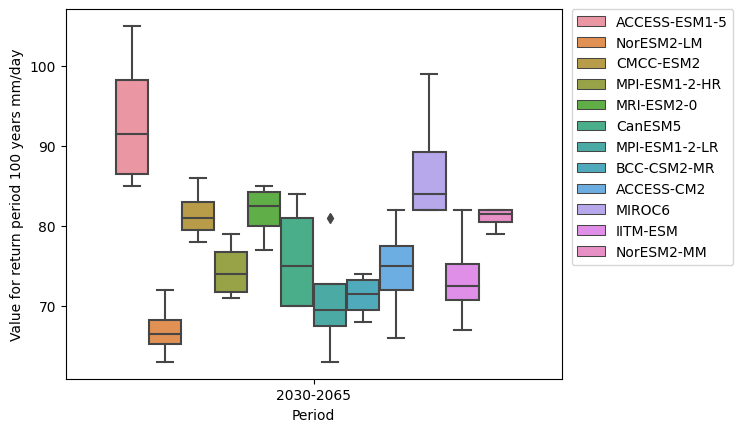

In [ ]:
sns.boxplot(data=df_return_period_NEX_GDDP_CMIP6_gorongosa[df_return_period_NEX_GDDP_CMIP6_gorongosa['Period']=='2030-2065'],x='Period',y='Value for return period 50 years mm/day',hue='Model')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

50 year
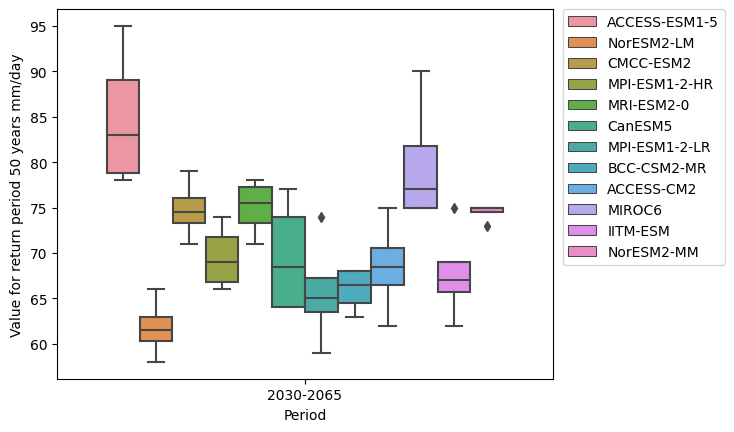

In [ ]:
# same with modeled data

In [ ]:
# return return period for dataframe of modelled data
def dataframe_threshold_coresponding_to_return_period_model(df,name_col):
    df_copy=df.copy(deep=True)
    df_copy=df_copy.drop(labels='Date',axis=1)
    df_max = df_copy.groupby(['Name project','Experiment','Model','Year']).max() # maximum    
    #return df_max
    midx = pd.MultiIndex.from_product([df_max.index.levels[0].tolist(),df_max.index.levels[1].tolist(),df_max.index.levels[2].tolist()],names=['Name project','Experiment', 'Model'])
    cols = ['Value for return period 50 years mm/day','Value for return period 100 years mm/day']
    return_period = pd.DataFrame(data = [], 
                                index = midx,
                                columns = cols)
    for name_p in df_max.index.levels[0].tolist():
        print(name_p)
        for ssp in df_max.index.levels[1].tolist():
            print(ssp)
            for model in df_max.index.levels[2].tolist():
                print(model)
                print('Name project '+name_p+ ' ssp '+ssp+ ' model '+model)
                Z=df_max.loc[(name_p,ssp,model)][name_col].values.reshape(len(df_max.loc[(name_p,ssp,model)][name_col]),)
                (loc1,scale)=stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
                # choice of gumbel because suits to extreme precipitation
                return_period.loc[(name_p,ssp,model),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
                return_period.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)
                
    return return_period

In [ ]:
df_return_period_NEX_GDDP_CMIP6_past=dataframe_threshold_coresponding_to_return_period_model(df_tasmax_NEXGDDPCMIP6_BC_NOAA_past.dropna(),'Mean of the daily precipitation rate mm_per_day')

In [ ]:
df_return_period_NEX_GDDP_CMIP6_past['Period']='1970-2014'

In [ ]:
df_return_period_NEX_GDDP_CMIP6_proj=dataframe_threshold_coresponding_to_return_period_model(df_tasmax_NEXGDDPCMIP6_BC_NOAA_proj.dropna(),'Mean of the daily precipitation rate mm_per_day')